# Milestone 1

### Data Set Information:

Data tersebut terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposito berjangka bank) akan ('ya') atau tidak ('tidak') berlangganan.

Tujuan klasifikasi adalah untuk memprediksi apakah klien akan berlangganan (ya/tidak) deposito berjangka (variabel y).

### Objective
Salah satu Institusi Bank Portugis memiliki produk sendiri (bank term deposit) yang diperuntukkan bagi klien mereka, berharap mereka tertarik dan bersedia berlangganan produk ini, sehingga bank dapat memperoleh keuntungan dengan menyerahkan uang.

Untuk menarik nasabah, bank melakukan kampanye pemasaran. Kampanye pemasaran didasarkan pada panggilan telepon (telemarketing). Bank harus mencari nasabah dengan kriteria tertentu sehingga dapat menentukan nasabah yang berpotensi tertarik untuk berlangganan produknya.

Dalam proyek analisis ini, kami akan menganalisis dataset yang diberikan kemudian kami memilih beberapa fitur untuk dilatih dengan beberapa model pembelajaran mesin. Semua model kemudian akan dievaluasi dan kita dapat memilih model terbaik yang menghasilkan prediksi dengan skor akurasi tertinggi. Model ini kemudian dapat membantu bank untuk memprediksi calon nasabah untuk berlangganan produk deposito berjangka mereka.

### Import Library

In [1]:
# for basic mathematics operation 
import numpy as np

# for dataframe manipulations
import pandas as pd

# for Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# to make this notebook's output identical at every run
np.random.seed(42)

### Data Loading

In [2]:
# Load the dataset
df = pd.read_csv("bank.csv")

In [3]:
# Look at the first 5 rows the dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


#### Attribute Information
##### Input variables:

bank client data :
- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')


related with the last contact of the current campaign :
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


other attributes :
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

##### Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: 'yes','no')

In [4]:
# Showing info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
# Get descriptive statistics
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
# Look at the shape of the dataset (# rows, # columns)
print("Shape of the dataset :", df.shape)

Shape of the dataset : (4521, 17)


### Data Cleaning
Mengecek apakah ada missing value atau data yang duplikat pada dataset

In [7]:
# Missing Value
print('Missing value :','\n', df.isnull().sum())
print("-----------------------------------------")
# Duplicated Data
print('Duplicated data : ', df.duplicated().sum())

Missing value : 
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
-----------------------------------------
Duplicated data :  0


Tidak adanya missing value ataupun data yang duplikat

### Exploratory Data Analysis (EDA)

Sekarang, kami menganalisis kriteria (fitur) yang mempengaruhi niat klien untuk berlangganan produk. Pertama, mari lihat kembali datasetnya.

In [8]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


Dataset ini terdiri dari 4521 baris dan 17 kolom (fitur). Kolom pada dataset tersebut berisi *informasi pribadi klien bank* (age, job, marital, education), *terkait dengan kontak terakhir dari kampanye saat ini* (contact, month, day, duration) dan *informasi lain dari pinjaman pribadi mereka* (default, housing, loan, balance).

Selanjutnya, mari kita melihat ditribusi data untuk data numerik.

### Numerical Data

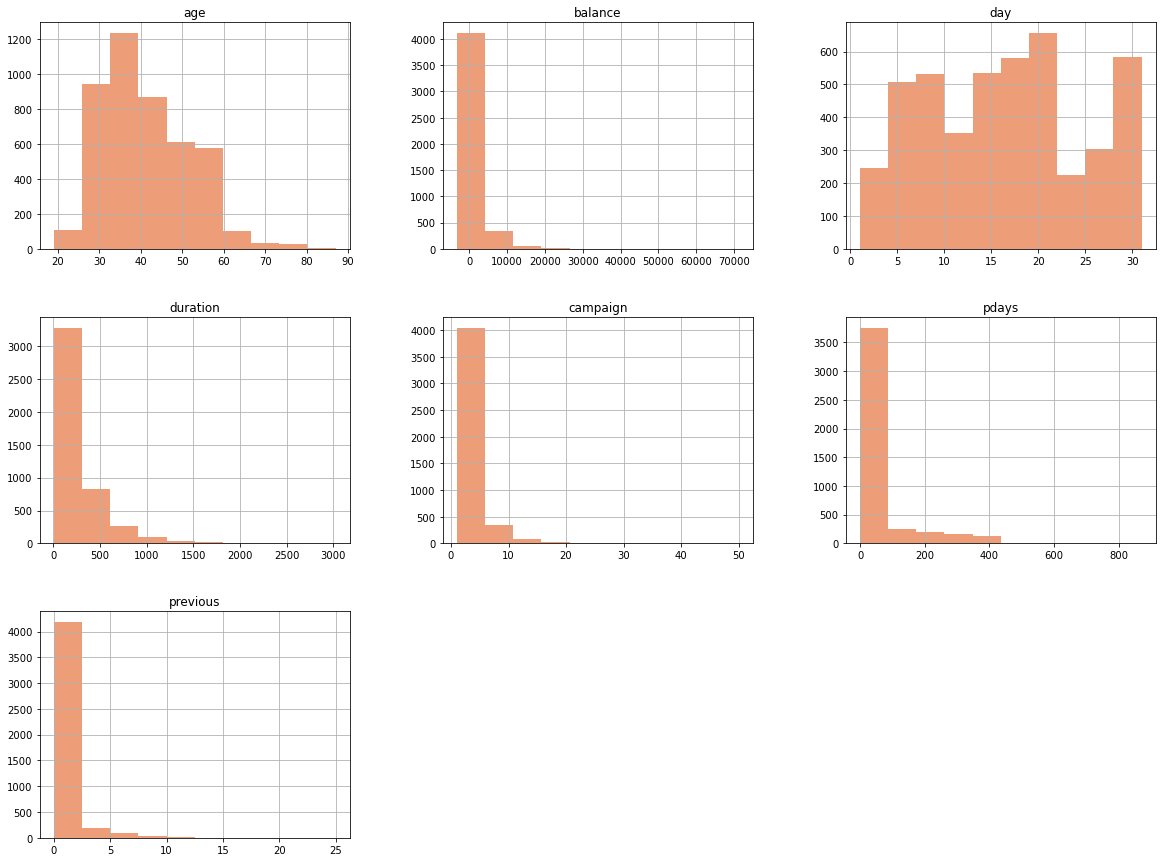

In [9]:
#Create histogram
fig = plt.figure(figsize = (20,15));
ax = fig.gca();
df.hist(ax = ax,color='#ed9e79');

Dari histogram diatas dapat dikatakan bahwa mayoritas data miring ke kanan, bisa disebut juga dengan data yang tidak simetris, maka rata-rata biasanya lebih besar dari median.

Setelah melihat ditribusi data numerik, mari melihat korelasi. Kita dapat melihat apakah adanya korelasi antara data numerik ini dengan target (y) yang kita tuju. 

In [10]:
# Merubah target (y) untuk bisa melihat korelasi data numerik dengan target (y)
df.replace({"y": {"no": 0, "yes": 1}}, inplace=True)

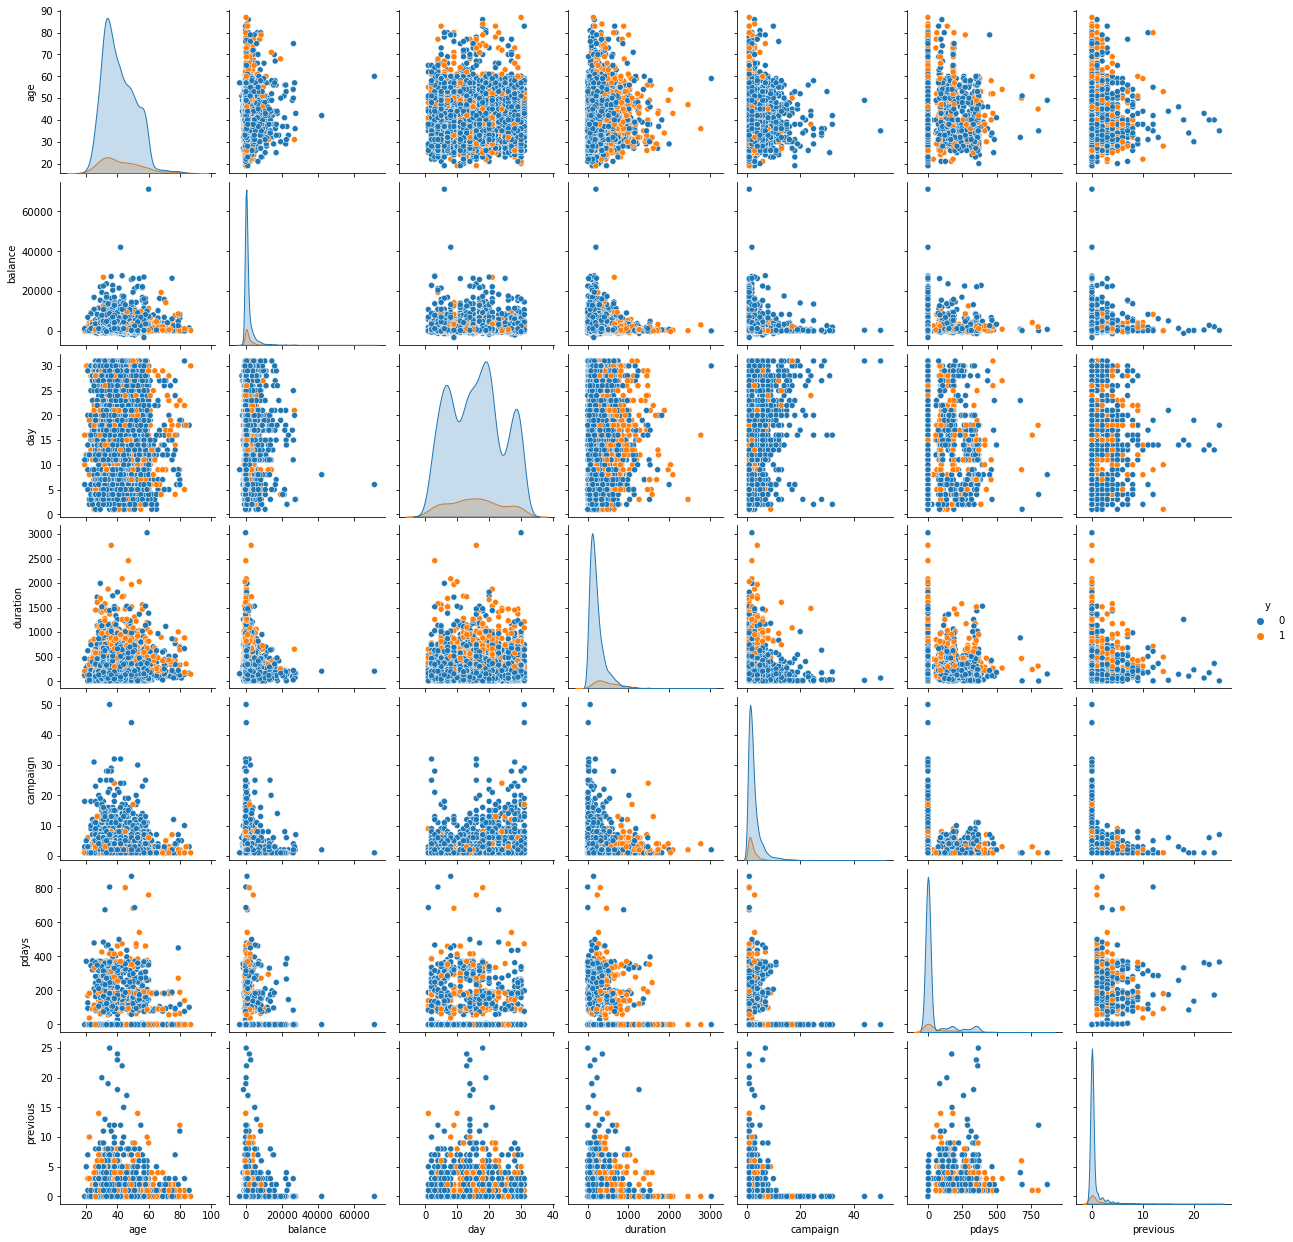

In [11]:
# Showing pairplot
sns.pairplot(data=df, hue='y')

Dari scatterplot diatas belum terlihat jelas karena target data kita adalah kategorical (*yes or no*), maka supaya lebih jelas untuk melihat korelasi antar fitur. Selain itu, kita juga bisa melihat dengan beberapa cara seperti dibawah ini.

In [12]:
# Correlation
df.corr()

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511,0.045092
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196,0.017905
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114,-0.011244
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080,0.401118
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833,-0.061147
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562,0.104087
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000,0.116714
y,0.045092,0.017905,-0.011244,0.401118,-0.061147,0.104087,0.116714,1.000000


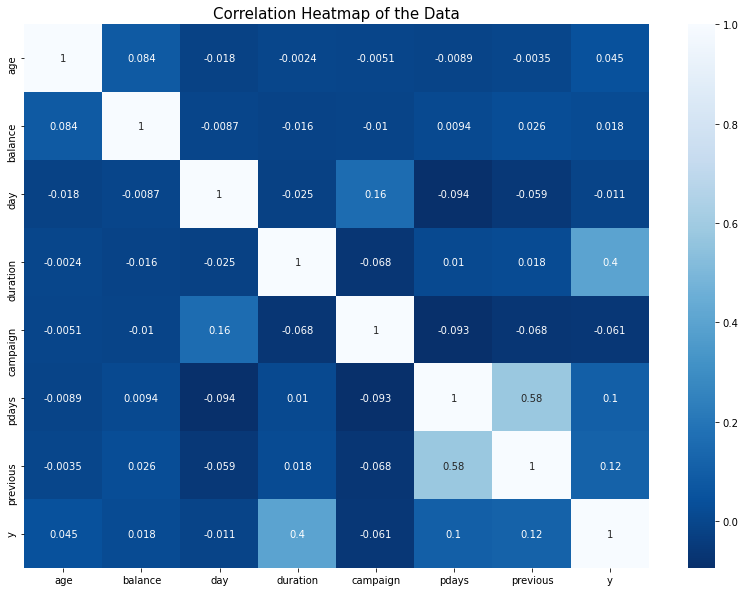

In [13]:
# Heatmap Correlation
plt.figure(figsize = (14, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues_r')
plt.title('Correlation Heatmap of the Data', fontsize = 15)
plt.show()

Dari kedua cara untuk melihat korelasi untuk data numerik. Tetapi, yang gampang untuk dilihat ialah menggunakan *Heatmap* untuk visualisasi. Dari Heatmap bisa dikatakan bahwa hanya **duration** yang memiliki korelasi yang tinggi dengan **y**.

### Categorical Data
Setelah menganalisa data numerik bisa dikatakan bahwa hanya hanya *duration* yang mempengaruhi *y* tetapi durasi tidak diketahui sebelum panggilan dilakukan maka mari kita lihat apakah ada korelasi antara data kategorik dengan target (y). Tetapi data kategorical ini berbeda dengan numerik yang dimana numerik bisa langsung mengetahui korelasi dengan hanya menggunakan heatmap sedangkan, dengan data kategorikal itu hanya bisa dilakukannya satu per satu. Berikut analisa data kategorik yang terdiri dari:
- Job
- Marital
- Education
- Contact
- Previous Outcome
- Age
- Default
- Loan
- Housing

Setelah menganalisa data numerik bisa dikatakan bahwa hanya hanya *duration* yang mempengaruhi *y* tetapi durasi tidak diketahui sebelum panggilan dilakukan maka mari kita lihat apakah ada korelasi antara data kategorik dengan target (y). Tetapi data kategorical ini berbeda dengan numerik yang dimana numerik bisa langsung mengetahui korelasi dengan hanya menggunakan heatmap sedangkan, dengan data kategorikal itu hanya bisa dilakukannya satu per satu. Berikut analisa data kategorik.

### Job

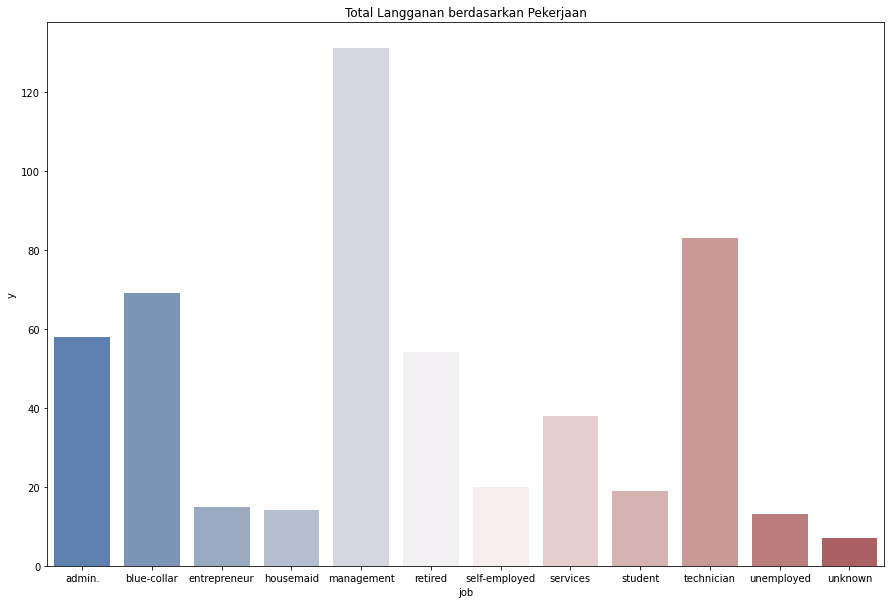

In [14]:
# Job vs y
df1 = df.groupby('job')[['y']].sum().reset_index()

# Graph
plt.figure(figsize=(15,10))
plt.title("Total Langganan berdasarkan Pekerjaan")
sns.barplot(data=df1, x='job', y='y', palette='vlag')
plt.show()

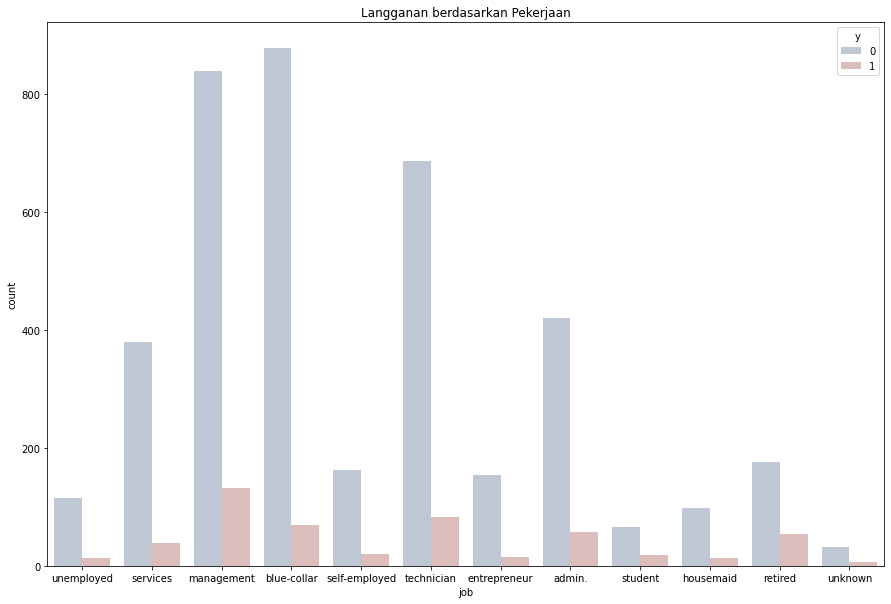

In [15]:
# Graph
plt.figure(figsize=(15,10))
plt.title("Langganan berdasarkan Pekerjaan")
sns.countplot(data=df, x='job', hue='y', palette = 'vlag')
plt.show()

Dapat dilihat dari barplot diatas bahwa orang yang memiliki pekerjaan sebagai **Management**, **Technician**, **Blue-collar**, **admin** dan **retired** yang berlangganan deposito pada bank ini. Walaupun, dengan jumlah penolakan mereka paling tinggi tetapi, pekerjaan-pekerjaan ini adalah sumber uang (penghasilan) yang paling dapat diandalkan untuk dijadikan klien. Dengan ini dapat dikatakan bisa menjadi bahan pertimbangan untuk dijadikan fitur.

### Marital
Ini hanya menunjukkan status perkawinan pelanggan

In [16]:
# Cross Tab to show the frequency between marital and y
ct_1 = pd.crosstab(df['marital'],df['y'])
ct_1

y,0,1
marital,,
divorced,451,77
married,2520,277
single,1029,167


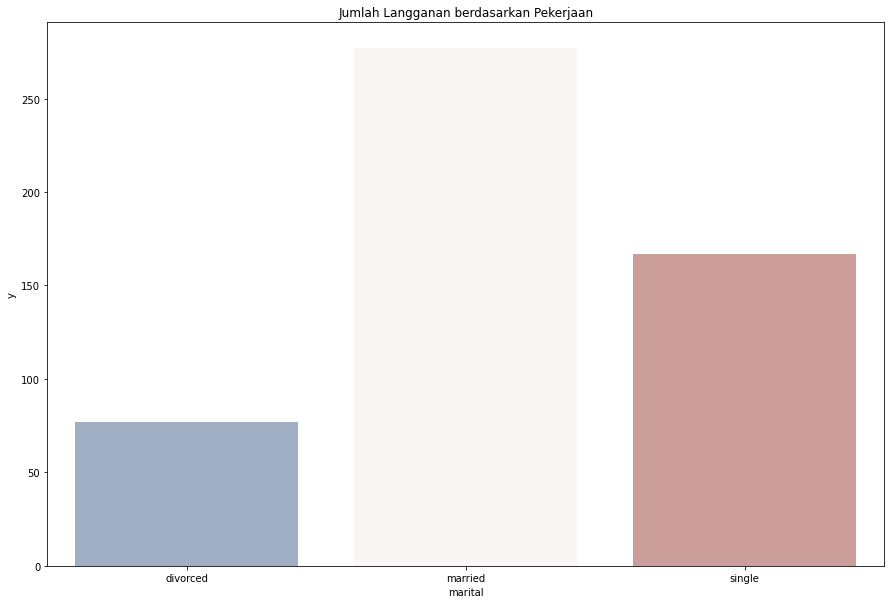

In [17]:
# Marital vs y
df2 = df.groupby('marital')[['y']].sum().reset_index()

# Graph
plt.figure(figsize=(15,10))
plt.title("Jumlah Langganan berdasarkan Pekerjaan")
sns.barplot(data=df2, x='marital', y='y', palette = 'vlag')
plt.show()

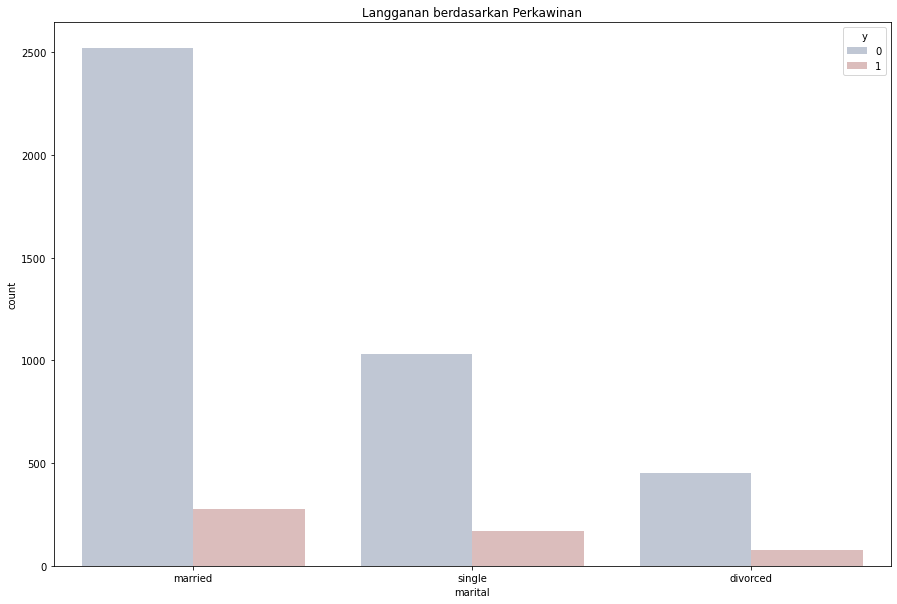

In [18]:
# Graph
plt.figure(figsize=(15,10))
plt.title("Langganan berdasarkan Perkawinan")
sns.countplot(data=df, x='marital', hue='y', palette = 'vlag')
plt.show()

Dari hasil diatas kita melihat tidak adanya banyak perbedaan dan jika dipikir status perkawinan itu tidak ada hubungannya dengan target (y) yang kita tuju. Maka kita memilih untuk tidak memilih fitur ini kedalam analisa berikutnya.

### Education
Pendidikan pelanggan ini dibagi menjadi beberapa tingkat yaitu **primary**, **secondary**, dan **tertiary** dan **unknown**

In [19]:
# Cross Tab to show the frequency between education and y
ct_2 = pd.crosstab(df['education'],df['y'])
ct_2

y,0,1
education,,
primary,614,64
secondary,2061,245
tertiary,1157,193
unknown,168,19


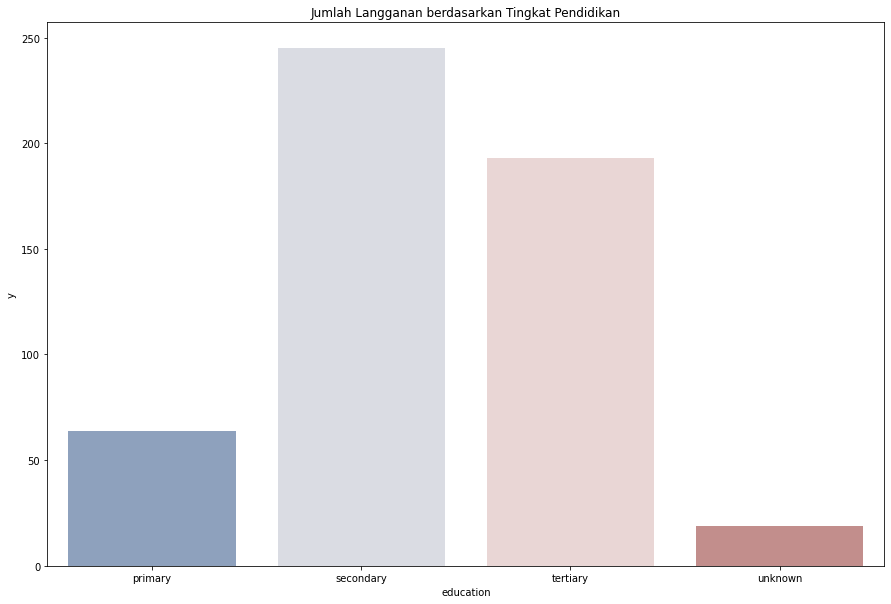

In [20]:
# Education vs y
df3 = df.groupby('education')[['y']].sum().reset_index()

# Graph
plt.figure(figsize=(15,10))
plt.title("Jumlah Langganan berdasarkan Tingkat Pendidikan")
sns.barplot(data=df3, x='education', y='y', palette = 'vlag')
plt.show()

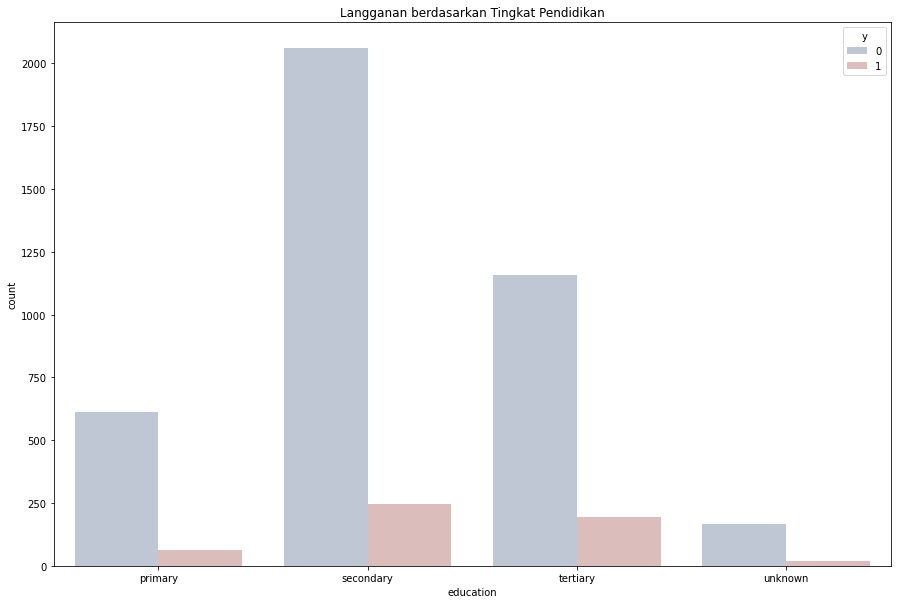

In [21]:
# Graph
plt.figure(figsize=(15,10))
plt.title("Langganan berdasarkan Tingkat Pendidikan")
sns.countplot(data=df, x='education', hue='y', palette = 'vlag')
plt.show()

Dilihat dari grafik diatas bahwa semakin tinggi tingkat pendidikan seseorang bisa diasumsikan bahwa mereka tertarik untuk berlangganan. Maka, bisa dikatakan bahwa tingkat pendidikan bisa mempengaruhi seseorang untuk berlangganan deposito.

### Contact
Jenis komunikasi yang dilakukan antara tim pemasaran dan klien saat melakukan kampanye sebuah produk.

In [22]:
# Cross Tab to show the frequency between contact and y
ct_3 = pd.crosstab(df['contact'],df['y'])
ct_3

y,0,1
contact,,
cellular,2480,416
telephone,257,44
unknown,1263,61


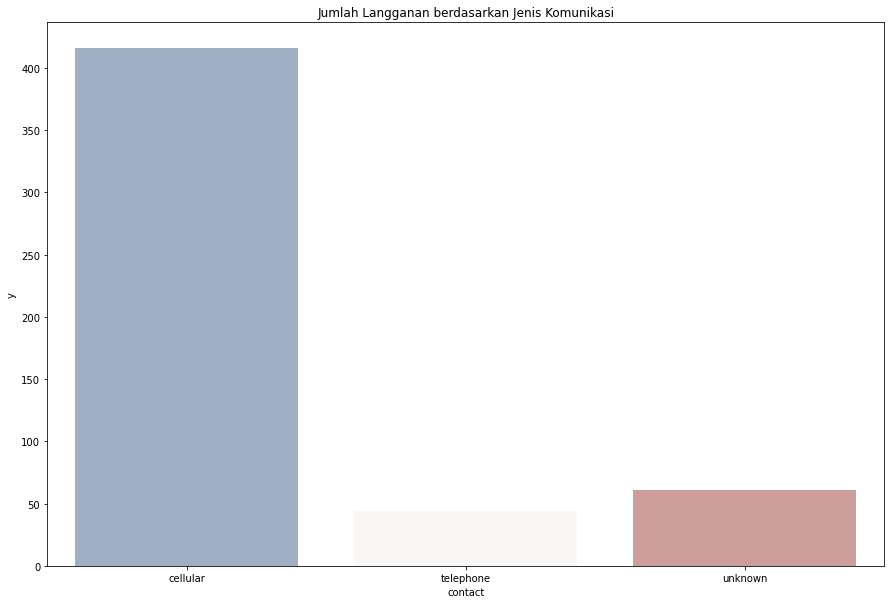

In [23]:
# Contact vs y
df4 = df.groupby('contact')[['y']].sum().reset_index()

# Graph
plt.figure(figsize=(15,10))
plt.title("Jumlah Langganan berdasarkan Jenis Komunikasi")
sns.barplot(data=df4, x='contact', y='y', palette = 'vlag')
plt.show()

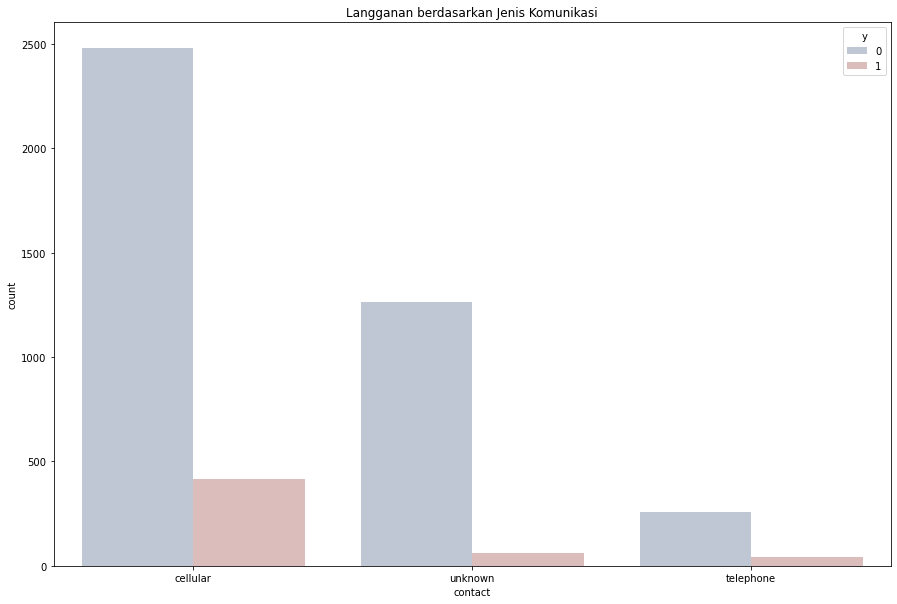

In [24]:
# Graph
plt.figure(figsize=(15,10))
plt.title("Langganan berdasarkan Jenis Komunikasi")
sns.countplot(data=df, x='contact', hue='y', palette = 'vlag')
plt.show()

Dari grafik diatas dapat dikatakan bahwa cara bank untuk menawarkan suatu produk melalui *cellular*. Tetapi, akan ada kemungkinan juga jika mereka menawarkan suatu produk melalui *telephone* karena zaman sekarang hampir semua orang menggunakan telepon genggam.

### Previous Outcome
Fitur ini menunjukkan hasil dari kampanye pemasaran sebelumnya.

In [25]:
# Cross Tab to show the frequency between poutcome and y
ct_4 = pd.crosstab(df['poutcome'],df['y'])
ct_4

y,0,1
poutcome,,
failure,427,63
other,159,38
success,46,83
unknown,3368,337


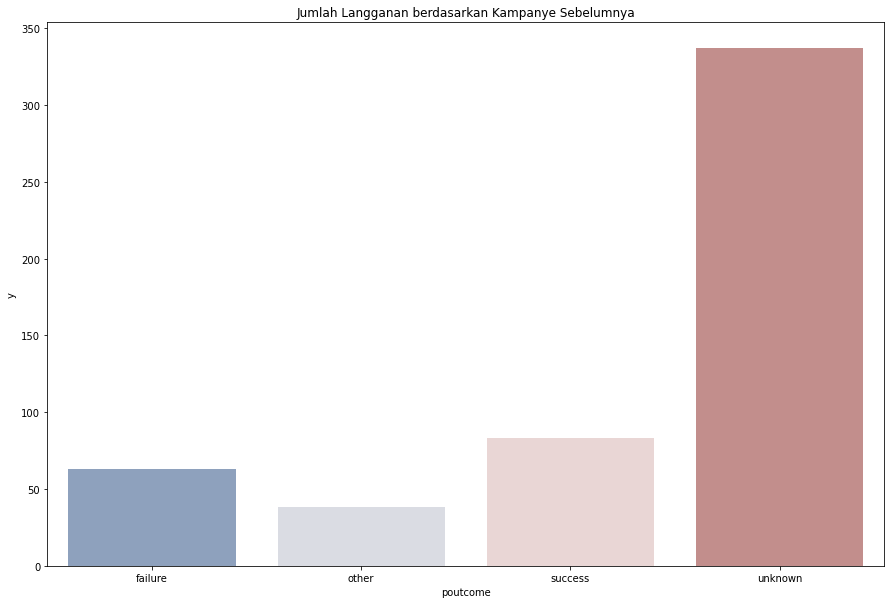

In [26]:
# Contact vs y
df5 = df.groupby('poutcome')[['y']].sum().reset_index()

# Graph
plt.figure(figsize=(15,10))
plt.title("Jumlah Langganan berdasarkan Kampanye Sebelumnya")
sns.barplot(data=df5, x='poutcome', y='y', palette = 'vlag')
plt.show()

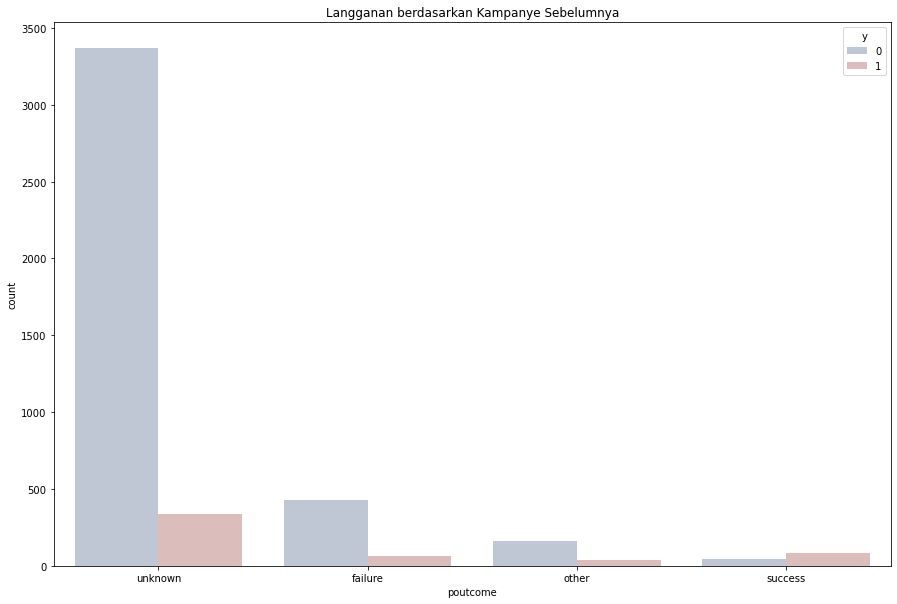

In [27]:
# Graph
plt.figure(figsize=(15,10))
plt.title("Langganan berdasarkan Kampanye Sebelumnya")
sns.countplot(data=df, x='poutcome', hue='y', palette = 'vlag')
plt.show()

Untuk sebagian besar pelanggan, hasil kampanye pemasaran sebelumnya tidak ada. Artinya sebagian besar pelanggan adalah pelanggan baru yang belum pernah dihubungi sebelumnya. Juga satu hal yang perlu diperhatikan di sini bahwa, untuk pelanggan yang memiliki hasil yang sukses dari kampanye sebelumnya, sebagian besar pelanggan tersebut berlangganan deposito berjangka.

### Age

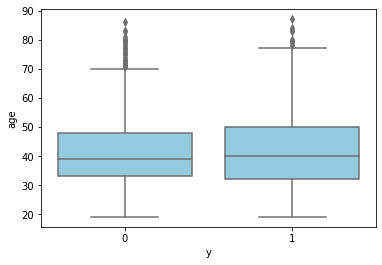

In [28]:
# Boxplot
sns.boxplot(data=df, x='y', y='age',color='skyblue')
plt.show();

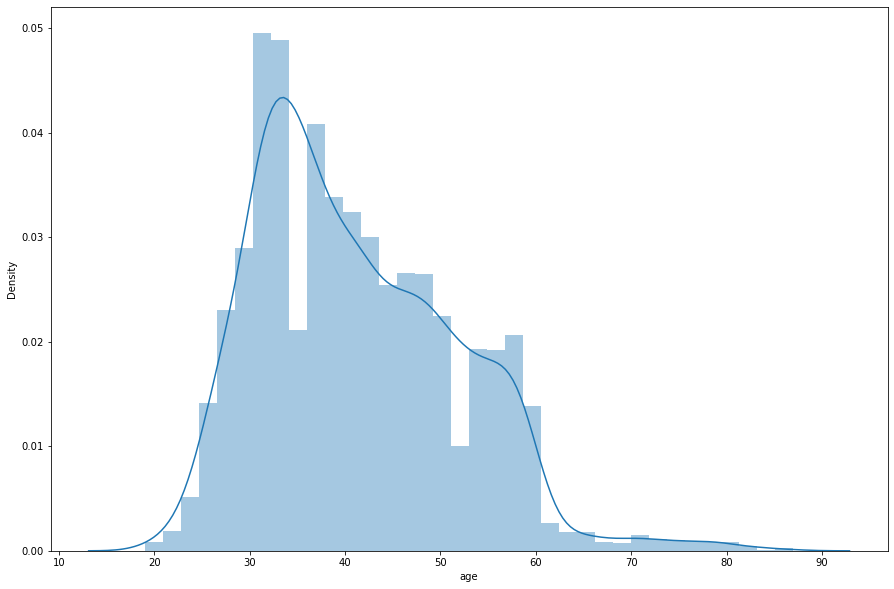

In [29]:
# Distplot
plt.figure(figsize=(15,10))
sns.distplot(df['age']);

Dari boxplot di atas kita tahu bahwa baik untuk pelanggan yang berlangganan atau tidak berlangganan deposito berjangka, memiliki usia rata-rata sekitar 38–40. Dan boxplot untuk kedua kelas tumpang tindih cukup banyak, yang berarti bahwa usia tidak selalu merupakan indikator yang baik untuk pelanggan mana yang akan berlangganan dan pelanggan mana yang tidak.

### Default, Loan dan Housing
Tiga kategorikal fitur terakhir adalah tentang kepemilikan pinjaman klien (default, loan dan housing)

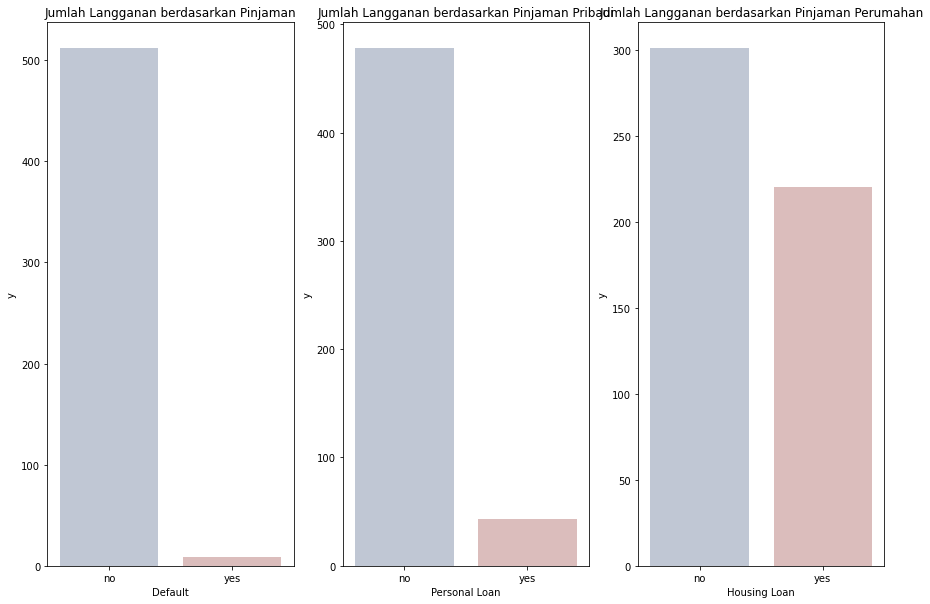

In [30]:
# Default vs y
df6 = df.groupby('default')[['y']].sum().reset_index()
# Loan vs y
df7 = df.groupby('loan')[['y']].sum().reset_index()
# Housing vs y
df8 = df.groupby('housing')[['y']].sum().reset_index()

plt.figure(figsize=(15,10))

# Graph
plt.subplot(1,3,1)
plt.title("Jumlah Langganan berdasarkan Pinjaman")
sns.barplot(data=df6, x='default', y='y', palette = 'vlag')
plt.xlabel("Default")
plt.subplot(1,3,2)
plt.title("Jumlah Langganan berdasarkan Pinjaman Pribadi")
sns.barplot(data=df7, x='loan', y='y', palette = 'vlag')
plt.xlabel("Personal Loan")
plt.subplot(1,3,3)
plt.title("Jumlah Langganan berdasarkan Pinjaman Perumahan")
sns.barplot(data=df8, x='housing', y='y', palette = 'vlag')
plt.xlabel("Housing Loan")
plt.show()

Dari grafik di atas kita dapat melihat bahwa klien yang tidak memiliki pinjaman pribadi tampaknya lebih tertarik untuk berlangganan produk bank saat ini. Namun berbeda dengan nasabah yang memiliki KPR, mereka tampaknya sama-sama tertarik untuk berlangganan seperti halnya nasabah yang tidak memiliki KPR.

Setelah melakukan beberapa pertimbangan maka kami memutuskan untuk memilih sebagian dari kategorikal untuk proses model pelatihan. Dikarenakan data numerik yang tidak memiliki signifikan dengan target (y) maka berikut adalah fitur-fitur yang akan digunakan:
- Job
- Education
- Poutcome
- Age
- Default
- Loan
- Housing

### Data Pre-processing
Pertama, kita mempersiapkan data dengan fitur-fitur yang sudah dipilih untuk pelatihan model

In [31]:
data = df.copy()

#### Labelling

In [32]:
data['job'] = data.job.astype("category").cat.codes
data['marital'] = data.marital.astype("category").cat.codes
data['education'] = data.education.astype("category").cat.codes
data['default'] = data.default.astype("category").cat.codes
data['housing'] = data.housing.astype("category").cat.codes
data['loan'] = data.loan.astype("category").cat.codes
data['contact'] = data.contact.astype("category").cat.codes
data['poutcome'] = data.poutcome.astype("category").cat.codes

In [33]:
data['month'].unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [34]:
data['month'] = data['month'].replace({"jan": 1, "feb": 2, "mar": 3,
                                   "apr": 4, "may": 5, "jun": 6,
                                  "jul": 7, "aug": 8,"sep": 9,
                                  "oct": 10, "nov": 11, "dec": 12})

In [35]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,5,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,4,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,5,226,1,-1,0,3,0


##### Normalize the dataset

In [36]:
# Standaridzed data menggunakan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data)

d = pd.DataFrame(scaler.transform(data), 
                  index=data.index, columns=data.columns)
d

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.161765,0.909091,0.5,0.000000,0.0,0.068455,0.0,0.0,0.0,0.600000,0.818182,0.024826,0.000000,0.000000,0.00,1.000000,0.0
1,0.205882,0.636364,0.5,0.333333,0.0,0.108750,1.0,1.0,0.0,0.333333,0.363636,0.071500,0.000000,0.389908,0.16,0.000000,0.0
2,0.235294,0.363636,1.0,0.666667,0.0,0.062590,1.0,0.0,0.0,0.500000,0.272727,0.059914,0.000000,0.379587,0.04,0.000000,0.0
3,0.161765,0.363636,0.5,0.666667,0.0,0.064281,1.0,1.0,1.0,0.066667,0.454545,0.064548,0.061224,0.000000,0.00,1.000000,0.0
4,0.588235,0.090909,0.5,0.333333,0.0,0.044469,1.0,0.0,1.0,0.133333,0.363636,0.073486,0.000000,0.000000,0.00,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.205882,0.636364,0.5,0.333333,0.0,0.039999,1.0,0.0,0.0,0.966667,0.545455,0.107580,0.081633,0.000000,0.00,1.000000,0.0
4517,0.558824,0.545455,0.5,0.666667,1.0,0.000000,1.0,1.0,1.0,0.266667,0.363636,0.049321,0.000000,0.000000,0.00,1.000000,0.0
4518,0.558824,0.818182,0.5,0.333333,0.0,0.048429,0.0,0.0,0.0,0.600000,0.636364,0.048659,0.204082,0.000000,0.00,1.000000,0.0
4519,0.132353,0.090909,0.5,0.333333,0.0,0.059731,0.0,0.0,0.0,0.166667,0.090909,0.041377,0.061224,0.243119,0.12,0.333333,0.0


##### Select the best Feature

In [37]:
# Untuk memberi informasi tentang top fitur
a = d.loc[:,d.columns!='y']
b = d[['y']]

# SelectKBest
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k='all')
selector.fit(a, b)
a_new = selector.transform(a)
print(a.columns[selector.get_support(indices=True)])

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')


Setelah dilakukan pemilihan fitur dan dipertimbangkan dari kategorikal dan numerikal maka fitur-fitur yang akan dipilih ialah:
- Balance
- Campaign
- Pdays
- Previous
- Job
- Education
- Poutcome
- Age
- Default
- Loan
- Housing

In [38]:
# Buat tabel baru untuk top fitur
data1 = data[['age', 'job', 'education', 'default', 'balance', 'housing',
       'loan', 'campaign', 'pdays','previous', 'poutcome','y']]
data1.head()

,age,job,education,default,balance,housing,loan,campaign,pdays,previous,poutcome,y
0,30,10,0,0,1787,0,0,1,-1,0,3,0
1,33,7,1,0,4789,1,1,1,339,4,0,0
2,35,4,2,0,1350,1,0,1,330,1,0,0
3,30,4,2,0,1476,1,1,4,-1,0,3,0
4,59,1,1,0,0,1,0,1,-1,0,3,0


#### Define X and y

In [39]:
# Mendefinisikan X dan y
X = data.drop(columns=['y'])
y = data['y']

#### Data Split
Memisahkan dataset menjadi 30% untuk test dan 70% untuk train.

In [40]:
# Mendefinisikan train, test pada X dan y
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

print("Total of Training data : ", len(X_train))
print("Total of Testing data : ", len(X_test))

Total of Training data :  3164
Total of Testing data :  1357


#### Scaling Data

In [41]:
# Standaridzed data menggunakan StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

num_pipe = Pipeline([('scaler', StandardScaler())])

In [42]:
X_train = num_pipe.fit_transform(X_train)
X_test = num_pipe.transform(X_test)

### Model Definition

Dalam analisis ini, kami menggunakan beberapa model dalam *Machine Learning* sebagai model untuk melatih dataset, seperti:
1. Logistic Regression
2. Support Vector Machine
3. Decision Tree
4. Random Forest Classifier
5. K Nearest Neighbour
6. Naive Bayes (Gaussian and Bernoulli)
7. Gradient Boost Classifier

### Model Training

In [43]:
# Model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### 1. Logistic Regression

In [44]:
# Define and fit
lr=LogisticRegression()
lr.fit(X_train,y_train)

# Predict
pred_lr=lr.predict(X_test)

# Accuracy Score
score_lr = accuracy_score(y_test, pred_lr)

# Confusion Matrix
lr_conf_matrix = confusion_matrix(y_test, pred_lr)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print(classification_report(y_test,pred_lr))

confusion matrix
[[1153   37]
 [ 132   35]]


              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1190
           1       0.49      0.21      0.29       167

    accuracy                           0.88      1357
   macro avg       0.69      0.59      0.61      1357
weighted avg       0.85      0.88      0.85      1357



In [45]:
# Cross Validation
cv_lr = cross_val_score(lr, X,y, cv=10)
print("Logistic Regression Accuracy: %0.2f (+/- %0.2f)" % (cv_lr.mean(), cv_lr.std()*2))

Logistic Regression Accuracy: 0.88 (+/- 0.02)


Dari hasil **Logistic Regression** dapat dikatakan bahwa:

Logistic Regression memiliki kemampuan yang cukup untuk mendeteksi **tidak berlangganan** dengan nilai *Precision* 0.90, nilai *Recall* 0.97 dan nilai F1 0.93 (hampir sempurna)

Dan memiliki kemampuan yang tidak baik untuk mendeteksi **berlangganan** dengan nilai *Precision* 0.49, nilai *Recall* 0.21 dan nilai F1 0.29

Jadi Logistic Regression memiliki akurasi yang cukup baik yaitu 0.88, lalu setelah dilakukannya cross validation di dapat dengan hasil yang sama yaitu 0.88.

### 2. Support Machine Vector

In [46]:
# Kernel = Linear dan C = 1
svc= SVC(kernel='linear',C=1)
svc.fit(X_train,y_train)

# Predict
pred_svc = svc.predict(X_test)

# Accuracy Score
score_svc = accuracy_score(y_test, pred_svc)

# Confusion Matrix
svc_conf_matrix = confusion_matrix(y_test, pred_svc)
print("confusion matrix")
print(svc_conf_matrix)
print("\n")
print(classification_report(y_test,pred_svc))

confusion matrix
[[1190    0]
 [ 167    0]]


              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1190
           1       0.00      0.00      0.00       167

    accuracy                           0.88      1357
   macro avg       0.44      0.50      0.47      1357
weighted avg       0.77      0.88      0.82      1357



Dari hasil **Support Machine Vector** dapat dikatakan bahwa:

Support Machine Vector memiliki kemampuan yang cukup untuk mendeteksi **tidak berlangganan** dengan nilai *Precision* 0.88, nilai *Recall* 1.00 dan nilai F1 0.93 (hampir sempurna)

Dan memiliki kemampuan yang tidak baik untuk mendeteksi **berlangganan** dengan nilai *Precision* 0.00, nilai *Recall* 0.00 dan nilai F1 0.00

Jadi Support Machine Vector memiliki akurasi yang cukup baik yaitu 0.88

### 3. Decision Tree

In [47]:
# Decision Tree
tree = DecisionTreeClassifier( max_depth= 20, criterion= 'gini',random_state=42)
tree.fit(X_train,y_train)

# Predict
pred_tree = tree.predict(X_test)

# Accuracy
score_tree = accuracy_score(y_test,pred_tree)

# Confusion Matrix
tree_conf_matrix = confusion_matrix(y_test, pred_tree)
print("confusion matrix")
print(tree_conf_matrix)
print("\n")
print(classification_report(y_test,pred_tree))

confusion matrix
[[1089  101]
 [  94   73]]


              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1190
           1       0.42      0.44      0.43       167

    accuracy                           0.86      1357
   macro avg       0.67      0.68      0.67      1357
weighted avg       0.86      0.86      0.86      1357



In [48]:
# Cross Validation
cv_tree = cross_val_score(tree, X,y, cv=10)
print("Decision Tree Accuracy: %0.2f (+/- %0.2f)" % (cv_tree.mean(), cv_tree.std()*2))

Decision Tree Accuracy: 0.86 (+/- 0.03)


Dari hasil **Decision Tree** dapat dikatakan bahwa:

Decision Tree memiliki kemampuan yang cukup untuk mendeteksi **tidak berlangganan** dengan nilai *Precision* 0.92, nilai *Recall* 0.92 dan nilai F1 0.92 (hampir sempurna)

Dan memiliki kemampuan yang tidak baik untuk mendeteksi **berlangganan** dengan nilai *Precision* 0.42, nilai *Recall* 0.44 dan nilai F1 0.43

Jadi Decision Tree memiliki akurasi yang cukup baik yaitu 0.86, lalu setelah dilakukannya cross validation di dapat dengan hasil yang sama yaitu 0.86.

### 4. Random Forest Classifier

In [49]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100,random_state=42,max_leaf_nodes=100,max_depth=5)
rfc.fit(X_train,y_train)

# Predict
pred_rfc = rfc.predict(X_test)

# Accuracy
score_rfc = accuracy_score(y_test,pred_rfc)

# Confusion Matrix
rfc_conf_matrix = confusion_matrix(y_test, pred_rfc)
print("confusion matrix")
print(rfc_conf_matrix)
print("\n")
print(classification_report(y_test,pred_rfc))

confusion matrix
[[1183    7]
 [ 148   19]]


              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1190
           1       0.73      0.11      0.20       167

    accuracy                           0.89      1357
   macro avg       0.81      0.55      0.57      1357
weighted avg       0.87      0.89      0.85      1357



In [50]:
# Cross Validation
cv_rfc = cross_val_score(rfc, X,y, cv=10)
print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (cv_rfc.mean(), cv_rfc.std()*2))

Random Forest Accuracy: 0.89 (+/- 0.01)


Dari hasil **Random Forest** dapat dikatakan bahwa:

Random Forest memiliki kemampuan yang cukup untuk mendeteksi **tidak berlangganan** dengan nilai *Precision* 0.89, nilai *Recall* 0.99 dan nilai F1 0.94 (hampir sempurna)

Dan memiliki kemampuan yang tidak baik untuk mendeteksi **berlangganan** dengan nilai *Precision* 0.73, nilai *Recall* 0.11 dan nilai F1 0.20

Jadi Random Forest memiliki akurasi yang cukup baik yaitu 0.89, lalu setelah dilakukannya cross validation di dapat dengan hasil yang sama yaitu 0.89.

### 5. KNN

In [51]:
# KNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

# Predict
pred_knn = knn.predict(X_test)

# Accuracy
score_knn = accuracy_score(y_test,pred_knn)

# Confusion Matrix
knn_conf_matrix = confusion_matrix(y_test, pred_knn)
print("confusion matrix")
print(knn_conf_matrix)
print("\n")
print(classification_report(y_test,pred_knn))

confusion matrix
[[1177   13]
 [ 143   24]]


              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1190
           1       0.65      0.14      0.24       167

    accuracy                           0.89      1357
   macro avg       0.77      0.57      0.59      1357
weighted avg       0.86      0.89      0.85      1357



In [52]:
# Cross Validation
cv_knn = cross_val_score(knn, X,y, cv=10)
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (cv_knn.mean(), cv_knn.std()*2))

KNN Accuracy: 0.88 (+/- 0.01)


Dari hasil **KNN** dapat dikatakan bahwa:

KNN memiliki kemampuan yang cukup untuk mendeteksi **tidak berlangganan** dengan nilai *Precision* 0.89, nilai *Recall* 0.99 dan nilai F1 0.94 (hampir sempurna)

Dan memiliki kemampuan yang tidak baik untuk mendeteksi **berlangganan** dengan nilai *Precision* 0.65, nilai *Recall* 0.14 dan nilai F1 0.24

Jadi KNN memiliki akurasi yang cukup baik yaitu 0.89, lalu setelah dilakukannya cross validation di dapat dengan hasil yang sama yaitu 0.88.

### 6. Naive Bayes

In [53]:
# Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train,y_train)

# Predict
pred_bnb = bnb.predict(X_test)

# Accuracy
score_bnb = accuracy_score(y_test,pred_bnb)

# Confusion Matrix
bnb_conf_matrix = confusion_matrix(y_test, pred_bnb)
print("confusion matrix")
print(bnb_conf_matrix)
print("\n")
print(classification_report(y_test,pred_bnb))

confusion matrix
[[1128   62]
 [ 129   38]]


              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1190
           1       0.38      0.23      0.28       167

    accuracy                           0.86      1357
   macro avg       0.64      0.59      0.60      1357
weighted avg       0.83      0.86      0.84      1357



In [54]:
# Cross Validation - Bernoulli
cv_bnb = cross_val_score(bnb, X,y, cv=10)
print("Bernoulli Naive Bayes Accuracy: %0.2f (+/- %0.2f)" % (cv_bnb.mean(), cv_bnb.std()*2))

Bernoulli Naive Bayes Accuracy: 0.87 (+/- 0.02)


Dari hasil **Naive Bayes - Bernoulli** dapat dikatakan bahwa:

Naive Bayes - Bernoulli memiliki kemampuan yang cukup untuk mendeteksi **tidak berlangganan** dengan nilai *Precision* 0.90, nilai *Recall* 0.95 dan nilai F1 0.92 (hampir sempurna)

Dan memiliki kemampuan yang tidak baik untuk mendeteksi **berlangganan** dengan nilai *Precision* 0.39, nilai *Recall* 0.23 dan nilai F1 0.28

Jadi Naive Bayes - Bernoulli memiliki akurasi yang cukup baik yaitu 0.86, lalu setelah dilakukannya cross validation di dapat dengan hasil yang sama yaitu 0.87.

In [55]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train,y_train)

# Predict
pred_gnb = gnb.predict(X_test)

# Accuracy
score_gnb = accuracy_score(y_test,pred_gnb)

# Confusion Matrix
gnb_conf_matrix = confusion_matrix(y_test, pred_gnb)
print("confusion matrix")
print(gnb_conf_matrix)
print("\n")
print(classification_report(y_test,pred_gnb))

confusion matrix
[[1029  161]
 [  91   76]]


              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1190
           1       0.32      0.46      0.38       167

    accuracy                           0.81      1357
   macro avg       0.62      0.66      0.63      1357
weighted avg       0.85      0.81      0.83      1357



In [56]:
# Cross Validation - Gaussian
cv_gnb = cross_val_score(gnb, X,y, cv=10)
print("Gaussian Naive Bayes Accuracy: %0.2f (+/- %0.2f)" % (cv_gnb.mean(), cv_gnb.std()*2))

Gaussian Naive Bayes Accuracy: 0.83 (+/- 0.03)


Dari hasil **Naive Bayes - Gaussian** dapat dikatakan bahwa:

Naive Bayes - Gaussian memiliki kemampuan yang cukup untuk mendeteksi **tidak berlangganan** dengan nilai *Precision* 0.92, nilai *Recall* 0.86 dan nilai F1 0.89 (hampir sempurna)

Dan memiliki kemampuan yang tidak baik untuk mendeteksi **berlangganan** dengan nilai *Precision* 0.32, nilai *Recall* 0.46 dan nilai F1 0.38

Jadi Naive Bayes - Gaussian memiliki akurasi yang cukup baik yaitu 0.81, lalu setelah dilakukannya cross validation di dapat dengan hasil yang sama yaitu 0.83.

### 7. Gradient Boosting Classifier

In [57]:
# Define gb
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Predict
pred_gb = gb.predict(X_test)

# Accuracy
score_gb = accuracy_score(y_test,pred_gb)

# Confusion Matrix
gb_conf_matrix = confusion_matrix(y_test, pred_gb)
print("confusion matrix")
print(gb_conf_matrix)
print("\n")
print(classification_report(y_test,pred_gb))

confusion matrix
[[1148   42]
 [ 107   60]]


              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1190
           1       0.59      0.36      0.45       167

    accuracy                           0.89      1357
   macro avg       0.75      0.66      0.69      1357
weighted avg       0.87      0.89      0.88      1357



In [58]:
# Cross Validation
cv_gb = cross_val_score(gb, X,y, cv=10)
print("Gradient Boosting Accuracy: %0.2f (+/- %0.2f)" % (cv_gb.mean(), cv_gb.std()*2))

Gradient Boosting Accuracy: 0.90 (+/- 0.03)


Dari hasil **Gradient Boosting** dapat dikatakan bahwa:

Gradient Boosting memiliki kemampuan yang cukup untuk mendeteksi **tidak berlangganan** dengan nilai *Precision* 0.91, nilai *Recall* 0.96 dan nilai F1 0.94 (hampir sempurna)

Dan memiliki kemampuan yang tidak baik untuk mendeteksi **berlangganan** dengan nilai *Precision* 0.59, nilai *Recall* 0.36 dan nilai F1 0.45

Jadi Gradient Boosting memiliki akurasi yang cukup baik yaitu 0.89, lalu setelah dilakukannya cross validation di dapat dengan hasil yang sama yaitu 0.90.

### ROC Curve

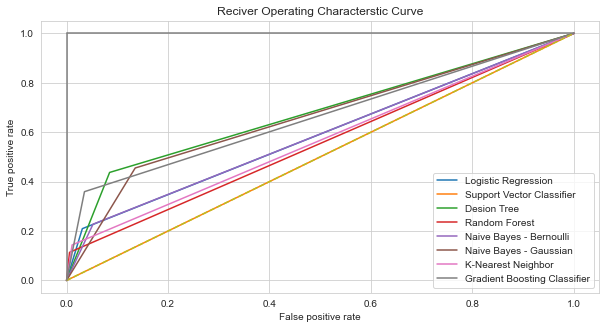

In [59]:
# Saving the confusion matrix result by using the roc_curve function
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_lr)
fpr2, tpr2, thresholds2 = roc_curve(y_test, pred_svc)
fpr3, tpr3, thresholds3 = roc_curve(y_test, pred_tree)
fpr4, tpr4, thresholds4 = roc_curve(y_test, pred_rfc)                              
fpr5, tpr5, thresholds5 = roc_curve(y_test, pred_bnb)
fpr6, tpr6, thresholds6 = roc_curve(y_test, pred_gnb)                               
fpr7, tpr7, thresholds7 = roc_curve(y_test, pred_knn)
fpr8, tpr8, thresholds8 = roc_curve(y_test, pred_gb)



# Shows the visualization of the ROC Curve from each model
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(fpr1, tpr1,label='Logistic Regression')
plt.plot(fpr2, tpr2,label='Support Vector Classifier')
plt.plot(fpr3, tpr3,label='Desion Tree')
plt.plot(fpr4, tpr4,label='Random Forest')
plt.plot(fpr5, tpr5,label='Naive Bayes - Bernoulli')
plt.plot(fpr6, tpr6,label='Naive Bayes - Gaussian')
plt.plot(fpr7, tpr7,label='K-Nearest Neighbor')
plt.plot(fpr8, tpr8,label='Gradient Boosting Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

### Model Accuracy

In [60]:
model = pd.DataFrame({'Model': ['Logistic Regression','Decision Tree','Random Forest',
                                   'K-Nearest Neighbour', 'Gaussian Naive Bayes', 'Bernoulli Naive Bayes',
                                   'Gradient Boost'], 
                         'Accuracy (%)': [score_lr*100, score_tree*100, score_rfc*100,
                                          score_knn*100, score_gnb*100, score_bnb*100, score_gb*100
                                         ],
                         'Mean Accuracy(%)': [cv_lr.mean()*100, cv_tree.mean()*100, 
                                              cv_rfc.mean()*100, cv_knn.mean()*100, 
                                              cv_gnb.mean()*100, cv_bnb.mean()*100, 
                                              cv_gb.mean()*100,
                                              ]
                        })
model

,Model,Accuracy (%),Mean Accuracy(%)
0,Logistic Regression,87.546057,88.409815
1,Decision Tree,85.630066,86.308387
2,Random Forest,88.577745,89.073238
3,K-Nearest Neighbour,88.504053,88.077810
4,Gaussian Naive Bayes,81.429624,83.477456
5,Bernoulli Naive Bayes,85.924834,87.060452
6,Gradient Boost,89.019897,89.560062


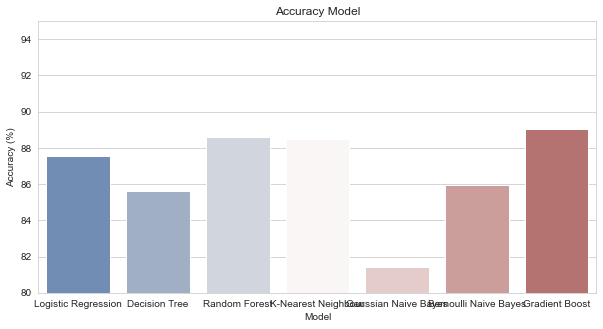

In [61]:
# Showing the Accuracy Model
plt.figure(figsize=(10,5))
plt.title('Accuracy Model')
sns.barplot(data=model, x='Model', y='Accuracy (%)', palette='vlag')
plt.ylim(80,95)
plt.show()

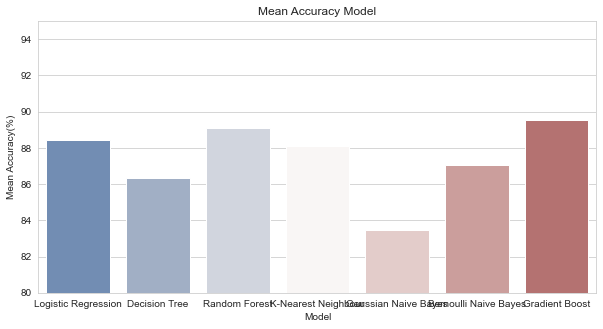

In [62]:
# Showing the Accuracy Model
plt.figure(figsize=(10,5))
plt.title('Mean Accuracy Model')
sns.barplot(data=model, x='Model', y='Mean Accuracy(%)', palette='vlag')
plt.ylim(80,95)
plt.show()

Setelah melakukan model pelatihan dan *cross validation*, kami memutuskan untuk mengambil 1 model terbaik yaitu **Random Forest** yang selanjutnya akan dicari parameter terbaiknya dan akan dilatih kembali. Walaupun dapat dilihat dari nilai akurasi bahwa model **Gradient Boost** lebih baik tetapi running time yang dibutuhkan lebih lama maka tidak direkomendasikan menggunakan model tersebut.

### Hyperparameter Tuning with GridSearchCV

In [63]:
params2 = [{
    'criterion':("gini", "entropy"),
    'n_estimators':[100, 150, 200],  
    'max_leaf_nodes':[100, 120, 150],
    'max_depth':[10,20]},

    {'bootstrap':[False], 
     'n_estimators':[100, 200]}]

rf_gs = GridSearchCV(rfc, params2, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, return_train_score=True)
rf_gs.fit(X_train, y_train)

Fitting 3 folds for each of 38 candidates, totalling 114 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=5, max_leaf_nodes=100,
                                              random_state=42),
             n_jobs=-1,
             param_grid=[{'criterion': ('gini', 'entropy'),
                          'max_depth': [10, 20],
                          'max_leaf_nodes': [100, 120, 150],
                          'n_estimators': [100, 150, 200]},
                         {'bootstrap': [False], 'n_estimators': [100, 200]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [64]:
best_params_rf = rf_gs.best_params_
print(f"Best parameters: {best_params_rf}")

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 150, 'n_estimators': 100}


In [65]:
# Random Forest with hyperparameters
rf1 = RandomForestClassifier(**best_params_rf)
rf1.fit(X_train, y_train)

# Predict
pred_rf1 = rf1.predict(X_test)

# Accuracy
score_rf1 = accuracy_score(y_test,pred_rf1)

# Confusion Matrix
rf1_conf_matrix = confusion_matrix(y_test, pred_rf1)
print("confusion matrix")
print(rf1_conf_matrix)
print("\n")
print(classification_report(y_test,pred_rf1))

confusion matrix
[[1155   35]
 [ 121   46]]


              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1190
           1       0.57      0.28      0.37       167

    accuracy                           0.89      1357
   macro avg       0.74      0.62      0.65      1357
weighted avg       0.86      0.89      0.87      1357



### Model Inference
Setelah melakukan pengevaluasian didapatkan hasil bahwa *Gradient Boosting* adalah model yang terbaik dengan akurasi 89% dan kita akan mencoba menguji dengan parameter terbaik

In [68]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,5,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,4,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,5,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,7,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,5,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,8,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,2,129,4,211,3,1,0


In [69]:
# New data 
new_data = [[35,8,2,1,0,4789,1,0,0,11,5,183,1,330,3,0]]

# Predict
predict = rf1.predict(new_data)

print("Hasil Klasifikasi model Random Forest : \n")
print('Target {}'.format(predict))

Hasil Klasifikasi model Random Forest : 

Target [1]


### Kesimpulan
1. Setelah dilakukan pemilihan fitur dan dipertimbangkan dari kategorikal dan numerikal maka fitur-fitur yang akan dipilih ialah:
- Balance
- Campaign
- Pdays
- Previous
- Job
- Education
- Poutcome
- Age
- Default
- Loan
- Housing
2. Setelah melakukan model pelatihan dan *cross validation*, kami memutuskan untuk mengambil 1 model terbaik yaitu **Random Forest** yang selanjutnya akan dicari parameter terbaiknya dan akan dilatih kembali. Walaupun dapat dilihat dari nilai akurasi bahwa model **Gradient Boost** lebih baik tetapi running time yang dibutuhkan lebih lama maka tidak direkomendasikan menggunakan model tersebut.
3. Maka kita dapat mengambil kesimpulan bahwa **Random Forest** setelah dilakukannya hyperparameters menjadi model yang terbaik untuk memprediksi niat klien bank untuk berlangganan deposito berjangka.